Metode TF / IDF


Nama : Valentino Aldo
Nim : A11.2021.13838
Matakuliah: STKI

In [1]:
import pandas as pd
import numpy as np

In [11]:

dataset = pd.read_csv('music.csv')

dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'\d+', '')  
dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'[^\w\s]', '')  
dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.lower()  
dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace('-', ' ')  

# Simpan kembali ke dalam file CSV
dataset.to_csv('music_cleaned.csv', index=False, sep=';')


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15376\4004783662.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'\d+', '')  # Hapus angka
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_15376\4004783662.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['Judul_Lagu'] = dataset['Judul_Lagu'].str.replace(r'[^\w\s]', '')  # Hapus karakter khusus


In [12]:
print(dataset)

                                    Judul_Lagu
0                     shape of you  ed sheeran
1                     bohemian rhapsody  queen
2                 billie jean  michael jackson
3                     hotel california  eagles
4                      someone like you  adele
..                                         ...
95                    shape of you  pentatonix
96           say you wont let go  james arthur
97    cant help falling in love  elvis presley
98   girls just want to have fun  cyndi lauper
99               brown eyed girl  van morrison

[100 rows x 1 columns]


In [13]:
import nltk
from nltk.tokenize import word_tokenize

dataset_cleaned = pd.read_csv('music_cleaned.csv', sep=';')

tokenized_list = []

for title in dataset_cleaned['Judul_Lagu']:
    tokens = word_tokenize(title)
    tokenized_list.append(tokens)

dataset_cleaned['Tokens'] = tokenized_list

dataset_cleaned.to_csv('music_with_tokens.csv', index=False, sep=';')


In [36]:
dataset_feature = dataset['Judul_Lagu'].astype(str)

In [37]:
dataset_feature

0                       shape of you  ed sheeran
1                       bohemian rhapsody  queen
2                   billie jean  michael jackson
3                       hotel california  eagles
4                        someone like you  adele
                         ...                    
95                      shape of you  pentatonix
96             say you wont let go  james arthur
97      cant help falling in love  elvis presley
98     girls just want to have fun  cyndi lauper
99                 brown eyed girl  van morrison
Name: Judul_Lagu, Length: 100, dtype: object

In [38]:
dataset.shape

(100, 1)

In [39]:
dataset

,Judul_Lagu
0,shape of you ed sheeran
1,bohemian rhapsody queen
2,billie jean michael jackson
3,hotel california eagles
4,someone like you adele
...,...
95,shape of you pentatonix
96,say you wont let go james arthur
97,cant help falling in love elvis presley
98,girls just want to have fun cyndi lauper


TF-IDF

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(dataset_feature)
print(X.shape)

(100, 331)


In [41]:
features = vectorizer.get_feature_names_out()
features

array(['abba', 'adele', 'africa', 'aguilera', 'alabama', 'all', 'always',
       'and', 'are', 'ariana', 'army', 'arthur', 'bad', 'ball', 'bamba',
       'bang', 'barkley', 'be', 'beatles', 'believin', 'bieber', 'billie',
       'billy', 'black', 'blinding', 'bling', 'blood', 'bob', 'bohemian',
       'bon', 'boogie', 'bowie', 'box', 'bradley', 'breath', 'brown',
       'bruno', 'cabello', 'california', 'camila', 'cant', 'cardi',
       'caroline', 'celine', 'chandelier', 'cheap', 'child', 'chris',
       'christina', 'church', 'clapton', 'clocks', 'coldplay', 'cooper',
       'counting', 'crazy', 'crow', 'cyndi', 'cyrus', 'daddy', 'dance',
       'dancing', 'david', 'deep', 'despacito', 'diamond', 'dion', 'dire',
       'dont', 'dragons', 'drake', 'dreams', 'dylan', 'eagles', 'earth',
       'ed', 'eilish', 'elton', 'elvis', 'eric', 'eurythmics', 'every',
       'eye', 'eyed', 'falling', 'feeling', 'fight', 'fire', 'firework',
       'fonsi', 'foster', 'ft', 'fun', 'funk', 'gaga', 'ga

In [42]:
idfValues = vectorizer.idf_
d = dict(zip(features, 9 - idfValues))
sortedDict = sorted(d.items(), key = lambda d: d[1], reverse = True)
for i in range(331):
    print(sortedDict[i])

('the', 6.275251241054905)
('ft', 5.9498288406202775)
('you', 5.582104060494959)
('of', 5.4643210248385765)
('in', 5.176638952386796)
('sweet', 5.176638952386796)
('like', 4.994317395592841)
('to', 4.994317395592841)
('bad', 4.771173844278631)
('beatles', 4.771173844278631)
('bruno', 4.771173844278631)
('cyrus', 4.771173844278631)
('go', 4.771173844278631)
('imagine', 4.771173844278631)
('jackson', 4.771173844278631)
('john', 4.771173844278631)
('justin', 4.771173844278631)
('let', 4.771173844278631)
('man', 4.771173844278631)
('mars', 4.771173844278631)
('michael', 4.771173844278631)
('on', 4.771173844278631)
('rolling', 4.771173844278631)
('sia', 4.771173844278631)
('adele', 4.48349177182685)
('all', 4.48349177182685)
('are', 4.48349177182685)
('billie', 4.48349177182685)
('billy', 4.48349177182685)
('black', 4.48349177182685)
('cant', 4.48349177182685)
('child', 4.48349177182685)
('christina', 4.48349177182685)
('dance', 4.48349177182685)
('david', 4.48349177182685)
('dont', 4.48349

In [43]:
from wordcloud import WordCloud
import matplotlib.pyplot as plot

def PlotWordCloud(frequency):
    worcloudPlot = WordCloud(background_color="white", width=1500, height=1000)
    worcloudPlot.generate_from_frequencies(frequencies=frequency)
    plot.figure(figsize=(15,10))
    plot.imshow(worcloudPlot, interpolation="bilinear")
    plot.axis("off")
    plot.show()

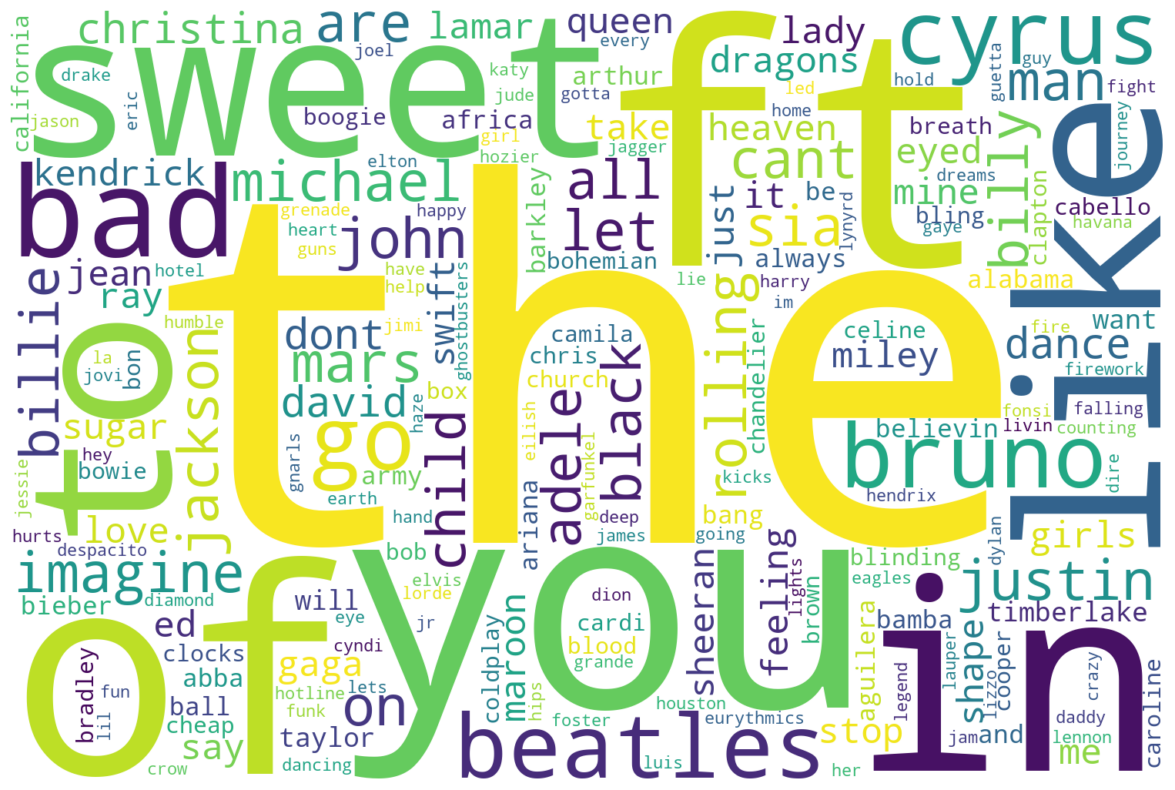

In [44]:
PlotWordCloud(d)